# StackExchange questions and Tags - Analysis

This Notebook is about Stackoverflow questions analysis in the goal of feature extraction and tagging
- I will start by importing libraries and Data 

## Libraries and frameworks

In [2]:
!pip install tqdm
!pip install flake8 --ignore-installed
!pip install pycodestyle_magic
!pip install wordcloud

  Using cached https://files.pythonhosted.org/packages/f8/1f/7ea40d1e4146ea55dbab41cda1376db092a75794914169aabd7e8d7a7def/flake8-3.7.9-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/ac/c6/44694103f8c221443ee6b0041f69e2740d89a25641e62fb4f2ee568f2f9c/entrypoints-0.3-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/84/f2/ed0ffb887f8138a8fe5a621b8c0bb9598bfb3989e029f6c6a85ee66628ee/pyflakes-2.1.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/0e/0c/04a353e104d2f324f8ee5f4b32012618c1c86dd79e52a433b64fceed511b/pycodestyle-2.5.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/87/89/479dc97e18549e21354893e4ee4ef36db1d237534982482c3681ee6e7b57/mccabe-0.6.1-py2.py3-none-any.whl


ERROR: spyder 3.3.6 requires pyqt5<5.13; python_version >= "3", which is not installed.
ERROR: spyder 3.3.6 requires pyqtwebengine<5.13; python_version >= "3", which is not installed.


In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
from matplotlib import rcParams
import matplotlib.cm as cm

from tqdm import tqdm

from wordcloud import WordCloud, STOPWORDS
from bs4 import BeautifulSoup
import nltk
import re

In [25]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ayoub\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
%load_ext pycodestyle_magic
%pycodestyle_on
%matplotlib inline

plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)

## Data import

In [5]:
df1 = pd.read_csv('C:/Users/ayoub/OCP6 Data/df1.csv')
df2 = pd.read_csv('C:/Users/ayoub/OCP6 Data/df2.csv')

In [6]:
df = pd.concat([df1, df2])

Text(0.5, 1.0, 'Proportion of NaNs in each column')

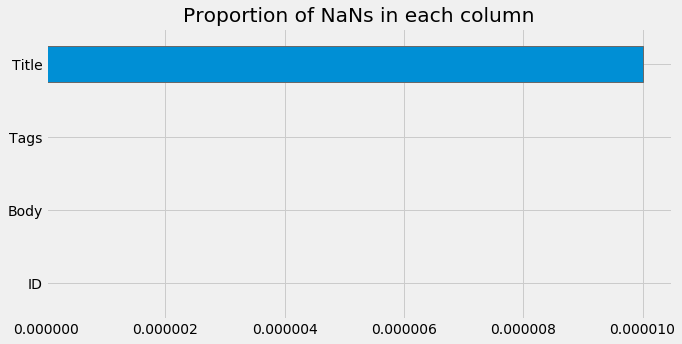

In [7]:
plt.figure(figsize=(10, 5))
df.isnull().mean(axis=0).sort_values().plot.barh()
plt.title("Proportion of NaNs in each column")

In [8]:
df.drop(['ID'], axis=1, inplace=True)
df.dropna(subset=['Title'], inplace=True)
df.reset_index(drop=True, inplace=True)

## Cleaning and Feature engineering

In this part, I am going to transform th Body which is in html code format into text with BeautifulSoup

In [9]:
def html(code):
    return BeautifulSoup(code, 'lxml').text

In [10]:
df['Body'] = df.Body.apply(html)

In [11]:
df.Body[0]

"I want to use a track-bar to change a form's opacity.\nThis is my code:\ndecimal trans = trackBar1.Value / 5000;\nthis.Opacity = trans;\n\nWhen I build the application, it gives the following error:\n\nCannot implicitly convert type decimal to double\n\nI tried using trans and double but then the control doesn't work. This code worked fine in a past VB.NET project.\n"

In [12]:
tokenizer = nltk.RegexpTokenizer(r'\w+')

In [13]:
# Create a list to store the body data
tokens = []

# For each row in the column,
for row in tqdm(df['Body']):
    tokens.append(tokenizer.tokenize(row))

# Create a column from the list
df['tokens'] = tokens

100%|██████████| 99999/99999 [00:04<00:00, 23408.00it/s]


In [28]:
# Create a list to store the body data
ttokens = []

# For each row in the column,
for row in tqdm(df['Title']):
    ttokens.append(tokenizer.tokenize(row))

# Create a column from the list
df['title_tokens'] = ttokens

100%|██████████| 99999/99999 [00:00<00:00, 273222.78it/s]


In [31]:
# Create a list to store the body data
tags = []

# For each row in the column,
for row in tqdm(df['Tags']):
    tags.append(nltk.word_tokenize(\
                                   re.sub('<', '', re.sub('>', '', re.sub('><', ' ', row)))))

# Create a column from the list
df['tags'] = tags

100%|██████████| 99999/99999 [00:08<00:00, 12091.73it/s]
6:36: E502 the backslash is redundant between brackets
7:80: E501 line too long (93 > 79 characters)


In [32]:
df.head()

,Body,Title,Tags,tokens,title_tokens,tags
0,I want to use a track-bar to change a form's o...,Convert Decimal to Double,<c#><floating-point><type-conversion><double><...,"[I, want, to, use, a, track, bar, to, change, ...","[Convert, Decimal, to, Double]","[c, #, floating-point, type-conversion, double..."
1,I have an absolutely positioned div containing...,Percentage width child element in absolutely p...,<html><css><internet-explorer-7>,"[I, have, an, absolutely, positioned, div, con...","[Percentage, width, child, element, in, absolu...","[html, css, internet-explorer-7]"
2,Given a DateTime representing a person's birth...,How do I calculate someone's age in C#?,<c#><.net><datetime>,"[Given, a, DateTime, representing, a, person, ...","[How, do, I, calculate, someone, s, age, in, C]","[c, #, .net, datetime]"
3,"Given a specific DateTime value, how do I disp...",Calculate relative time in C#,<c#><datetime><time><datediff><relative-time-s...,"[Given, a, specific, DateTime, value, how, do,...","[Calculate, relative, time, in, C]","[c, #, datetime, time, datediff, relative-time..."
4,Is there a standard way for a web server to be...,Determine a user's timezone,<html><browser><timezone><user-agent><timezone...,"[Is, there, a, standard, way, for, a, web, ser...","[Determine, a, user, s, timezone]","[html, browser, timezone, user-agent, timezone..."


I am going to identify most used words that show no meaning to our case and earase them along with the StopWords

In [ ]:
freq_totale = nltk.Counter()
for k in tokens:
    freq_totale += freq_totale[k]